In [1]:
import torch 
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from tqdm import tqdm
import random

from src.NN.multi_step_pred import *
from src.NN.custom_emlp_multistep import *
from src.NN.aug_multistep import *

/mnt/d_disk/ch20b065/.conda/envs/liegan/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/mnt/d_disk/ch20b065/.conda/envs/liegan/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
from Data.spring_mass_dataset import * 
from torch.utils.data import Subset, DataLoader

input_timesteps = 4
output_timesteps = 2
n_dim = 2

# Generating the dataset 

# data_dict = generate_spring_mass_dataset(
#     save_path='./data/spring_mass_dataset.pkl',
#     num_trajectories=2000,
#     t_span=(0, 10),
#     num_steps=100,
#     test_split=0.1,
#     mass=1.0,
#     k=1.0,
#     damping=0.0,
#     random_seed=42
# )

train_dataset = SpringMassDataset(
    save_path='./data/spring_mass_dataset.pkl',
    input_timesteps = input_timesteps,
    output_timesteps = output_timesteps,
    mode='train'
)

test_dataset = SpringMassDataset(
    save_path='./data/spring_mass_dataset.pkl',
    input_timesteps = input_timesteps,
    output_timesteps = output_timesteps,
    mode='test'
)

# Get the actual size of the dataset
train_size = 2000
test_size = 400

# Sample accordingly
train_indices = np.random.choice(len(train_dataset), size=train_size, replace=False)
test_indices = np.random.choice(len(test_dataset), size=test_size, replace=False)

train_dataset = Subset(train_dataset,train_indices)
test_dataset = Subset(test_dataset,test_indices)

In [3]:

print('\nTraining Multi Step Prediction Model...')

batch_size = 64 
epochs = 500 
lr = 1e-3 

model, stats = train_PredModel(train_dataset,test_dataset,batch_size,epochs,lr,n_dim,input_timesteps,output_timesteps)


Training Multi Step Prediction Model...
Starting training: 500 epochs


  0%|          | 2/500 [00:00<02:07,  3.90it/s]

Epoch 1/500, Train Loss: 0.099471, Test Loss: 0.022450


  2%|▏         | 12/500 [00:01<01:03,  7.65it/s]

Epoch 11/500, Train Loss: 0.009346, Test Loss: 0.000933


  5%|▍         | 23/500 [00:02<00:45, 10.45it/s]

Epoch 21/500, Train Loss: 0.006897, Test Loss: 0.000558


  7%|▋         | 33/500 [00:03<00:43, 10.71it/s]

Epoch 31/500, Train Loss: 0.006740, Test Loss: 0.000672


  9%|▊         | 43/500 [00:04<00:44, 10.36it/s]

Epoch 41/500, Train Loss: 0.006146, Test Loss: 0.000685


 11%|█         | 53/500 [00:05<00:41, 10.71it/s]

Epoch 51/500, Train Loss: 0.005911, Test Loss: 0.000514


 13%|█▎        | 63/500 [00:06<00:40, 10.79it/s]

Epoch 61/500, Train Loss: 0.005632, Test Loss: 0.000790


 15%|█▍        | 73/500 [00:07<00:40, 10.59it/s]

Epoch 71/500, Train Loss: 0.005784, Test Loss: 0.000636


 17%|█▋        | 83/500 [00:08<00:38, 10.73it/s]

Epoch 81/500, Train Loss: 0.005385, Test Loss: 0.000736


 19%|█▊        | 93/500 [00:09<00:37, 10.92it/s]

Epoch 91/500, Train Loss: 0.005764, Test Loss: 0.000543


 21%|██        | 103/500 [00:10<00:36, 10.92it/s]

Epoch 101/500, Train Loss: 0.005153, Test Loss: 0.000930


 23%|██▎       | 113/500 [00:11<00:34, 11.12it/s]

Epoch 111/500, Train Loss: 0.005402, Test Loss: 0.000603


 25%|██▍       | 123/500 [00:12<00:33, 11.10it/s]

Epoch 121/500, Train Loss: 0.005314, Test Loss: 0.000699


 27%|██▋       | 133/500 [00:13<00:34, 10.77it/s]

Epoch 131/500, Train Loss: 0.005474, Test Loss: 0.000485


 29%|██▊       | 143/500 [00:14<00:32, 11.11it/s]

Epoch 141/500, Train Loss: 0.005149, Test Loss: 0.000438


 31%|███       | 153/500 [00:15<00:32, 10.62it/s]

Epoch 151/500, Train Loss: 0.005286, Test Loss: 0.000384


 33%|███▎      | 163/500 [00:15<00:31, 10.69it/s]

Epoch 161/500, Train Loss: 0.005109, Test Loss: 0.000256


 35%|███▍      | 173/500 [00:16<00:30, 10.87it/s]

Epoch 171/500, Train Loss: 0.005061, Test Loss: 0.000526


 37%|███▋      | 183/500 [00:17<00:29, 10.64it/s]

Epoch 181/500, Train Loss: 0.004833, Test Loss: 0.000565


 39%|███▊      | 193/500 [00:18<00:28, 10.69it/s]

Epoch 191/500, Train Loss: 0.004893, Test Loss: 0.000301


 41%|████      | 203/500 [00:19<00:27, 10.94it/s]

Epoch 201/500, Train Loss: 0.004874, Test Loss: 0.000571


 43%|████▎     | 213/500 [00:20<00:26, 10.87it/s]

Epoch 211/500, Train Loss: 0.004937, Test Loss: 0.000453


 45%|████▍     | 223/500 [00:21<00:25, 11.00it/s]

Epoch 221/500, Train Loss: 0.004963, Test Loss: 0.000523


 47%|████▋     | 233/500 [00:22<00:24, 11.04it/s]

Epoch 231/500, Train Loss: 0.004658, Test Loss: 0.000487


 49%|████▊     | 243/500 [00:23<00:23, 10.91it/s]

Epoch 241/500, Train Loss: 0.004597, Test Loss: 0.000421


 51%|█████     | 253/500 [00:24<00:22, 10.92it/s]

Epoch 251/500, Train Loss: 0.004696, Test Loss: 0.000686


 53%|█████▎    | 263/500 [00:25<00:21, 11.10it/s]

Epoch 261/500, Train Loss: 0.004513, Test Loss: 0.000382


 55%|█████▍    | 273/500 [00:25<00:20, 11.15it/s]

Epoch 271/500, Train Loss: 0.004403, Test Loss: 0.000814


 57%|█████▋    | 283/500 [00:26<00:19, 10.91it/s]

Epoch 281/500, Train Loss: 0.004530, Test Loss: 0.000567


 59%|█████▊    | 293/500 [00:27<00:19, 10.89it/s]

Epoch 291/500, Train Loss: 0.004505, Test Loss: 0.000600


 61%|██████    | 303/500 [00:28<00:18, 10.92it/s]

Epoch 301/500, Train Loss: 0.004283, Test Loss: 0.000861


 63%|██████▎   | 313/500 [00:29<00:16, 11.03it/s]

Epoch 311/500, Train Loss: 0.004529, Test Loss: 0.000585


 65%|██████▍   | 323/500 [00:30<00:15, 11.08it/s]

Epoch 321/500, Train Loss: 0.004153, Test Loss: 0.000539


 67%|██████▋   | 333/500 [00:31<00:15, 11.00it/s]

Epoch 331/500, Train Loss: 0.004444, Test Loss: 0.000820


 69%|██████▊   | 343/500 [00:32<00:14, 10.85it/s]

Epoch 341/500, Train Loss: 0.004361, Test Loss: 0.000805


 71%|███████   | 353/500 [00:33<00:13, 10.98it/s]

Epoch 351/500, Train Loss: 0.004433, Test Loss: 0.001010


 73%|███████▎  | 363/500 [00:34<00:12, 11.32it/s]

Epoch 361/500, Train Loss: 0.003938, Test Loss: 0.000975


 75%|███████▍  | 373/500 [00:35<00:12, 10.40it/s]

Epoch 371/500, Train Loss: 0.004177, Test Loss: 0.000765


 77%|███████▋  | 383/500 [00:36<00:10, 11.01it/s]

Epoch 381/500, Train Loss: 0.004192, Test Loss: 0.000786


 79%|███████▊  | 393/500 [00:36<00:09, 11.00it/s]

Epoch 391/500, Train Loss: 0.004143, Test Loss: 0.000889


 81%|████████  | 403/500 [00:37<00:08, 11.26it/s]

Epoch 401/500, Train Loss: 0.004025, Test Loss: 0.000690


 83%|████████▎ | 413/500 [00:38<00:07, 11.10it/s]

Epoch 411/500, Train Loss: 0.004012, Test Loss: 0.000716


 85%|████████▍ | 423/500 [00:39<00:06, 11.15it/s]

Epoch 421/500, Train Loss: 0.003943, Test Loss: 0.001247


 87%|████████▋ | 433/500 [00:40<00:06, 10.93it/s]

Epoch 431/500, Train Loss: 0.004081, Test Loss: 0.000991


 89%|████████▊ | 443/500 [00:41<00:05, 10.90it/s]

Epoch 441/500, Train Loss: 0.003722, Test Loss: 0.000750


 91%|█████████ | 453/500 [00:42<00:04, 10.88it/s]

Epoch 451/500, Train Loss: 0.003832, Test Loss: 0.000647


 93%|█████████▎| 463/500 [00:43<00:03, 11.00it/s]

Epoch 461/500, Train Loss: 0.003797, Test Loss: 0.001286


 95%|█████████▍| 473/500 [00:44<00:02, 11.17it/s]

Epoch 471/500, Train Loss: 0.003792, Test Loss: 0.000841


 97%|█████████▋| 483/500 [00:45<00:01, 10.79it/s]

Epoch 481/500, Train Loss: 0.004035, Test Loss: 0.000739


 99%|█████████▊| 493/500 [00:46<00:00, 11.22it/s]

Epoch 491/500, Train Loss: 0.003989, Test Loss: 0.000985


100%|██████████| 500/500 [00:46<00:00, 10.71it/s]

Epoch 500/500, Train Loss: 0.003976, Test Loss: 0.000927


In [4]:
n_channel = 1

lie_algebra = get_generators(n_dim,n_channel,'saved_model/LieGAN/spring_mass/spring_mass_generator_99.pt','spring_mass')
G = CustomGroup(n_dim,lie_algebra) 

In [5]:
print('\n Training EMLP Multi Step Prediction Model...') 



model_emlp, stats_emlp = train_predModel_emlp(
    G, train_dataset, test_dataset,
    batch_size, epochs, lr, 
    n_dim, input_timesteps, output_timesteps
)


 Training EMLP Multi Step Prediction Model...
Starting training: 500 epochs


  1%|          | 3/500 [00:19<41:31,  5.01s/it]  

Epoch 1/500, Train Loss: 0.138685, Test Loss: 0.141778


  2%|▏         | 9/500 [00:19<17:58,  2.20s/it]

Early stopping at epoch 10 - test loss: 0.00000034


In [6]:
print('\n Training Augmentation Prediction Model...') 

generator = get_generator(n_dim,'saved_model/LieGAN/spring_mass/args_spring_mass.pkl')
batch_size = 64 
epochs = 500 
lr = 1e-3 


model_aug, stats_aug = train_augPred(
    generator, train_dataset, test_dataset, 
    batch_size,epochs,lr, n_dim, input_timesteps,output_timesteps,n_copy=10
)



 Training Augmentation Prediction Model...
Starting training: 500 epochs


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 1/500 [00:00<04:18,  1.93it/s]

Epoch 1/500, Train Loss: 0.503523, Test Loss: 0.096195


  2%|▏         | 11/500 [00:03<02:33,  3.19it/s]

Epoch 11/500, Train Loss: 0.029773, Test Loss: 0.008737


  4%|▍         | 21/500 [00:06<02:24,  3.31it/s]

Epoch 21/500, Train Loss: 0.015314, Test Loss: 0.002616


  6%|▌         | 31/500 [00:09<02:23,  3.28it/s]

Epoch 31/500, Train Loss: 0.011410, Test Loss: 0.002033


  8%|▊         | 41/500 [00:12<02:20,  3.27it/s]

Epoch 41/500, Train Loss: 0.009388, Test Loss: 0.001752


 10%|█         | 51/500 [00:15<02:17,  3.28it/s]

Epoch 51/500, Train Loss: 0.008079, Test Loss: 0.001894


 12%|█▏        | 61/500 [00:18<02:14,  3.27it/s]

Epoch 61/500, Train Loss: 0.006994, Test Loss: 0.001233


 14%|█▍        | 71/500 [00:21<02:04,  3.43it/s]

Epoch 71/500, Train Loss: 0.007026, Test Loss: 0.000969


 16%|█▌        | 81/500 [00:24<02:02,  3.41it/s]

Epoch 81/500, Train Loss: 0.006411, Test Loss: 0.000658


 18%|█▊        | 91/500 [00:27<02:05,  3.27it/s]

Epoch 91/500, Train Loss: 0.006214, Test Loss: 0.000812


 20%|██        | 101/500 [00:30<02:01,  3.28it/s]

Epoch 101/500, Train Loss: 0.006082, Test Loss: 0.000553


 22%|██▏       | 111/500 [00:34<01:58,  3.27it/s]

Epoch 111/500, Train Loss: 0.006019, Test Loss: 0.000805


 24%|██▍       | 121/500 [00:37<01:55,  3.27it/s]

Epoch 121/500, Train Loss: 0.005423, Test Loss: 0.000569


 26%|██▌       | 131/500 [00:40<01:50,  3.33it/s]

Epoch 131/500, Train Loss: 0.005467, Test Loss: 0.000547


 28%|██▊       | 141/500 [00:43<01:49,  3.28it/s]

Epoch 141/500, Train Loss: 0.005650, Test Loss: 0.000600


 30%|███       | 151/500 [00:46<01:44,  3.33it/s]

Epoch 151/500, Train Loss: 0.005317, Test Loss: 0.000801


 32%|███▏      | 161/500 [00:49<01:43,  3.28it/s]

Epoch 161/500, Train Loss: 0.005449, Test Loss: 0.000643


 34%|███▍      | 171/500 [00:52<01:40,  3.29it/s]

Epoch 171/500, Train Loss: 0.005182, Test Loss: 0.000590


 36%|███▌      | 181/500 [00:55<01:37,  3.27it/s]

Epoch 181/500, Train Loss: 0.005140, Test Loss: 0.000669


 38%|███▊      | 191/500 [00:58<01:35,  3.23it/s]

Epoch 191/500, Train Loss: 0.005245, Test Loss: 0.000411


 40%|████      | 201/500 [01:01<01:31,  3.26it/s]

Epoch 201/500, Train Loss: 0.005030, Test Loss: 0.000600


 42%|████▏     | 211/500 [01:04<01:28,  3.27it/s]

Epoch 211/500, Train Loss: 0.005071, Test Loss: 0.000637


 44%|████▍     | 221/500 [01:07<01:25,  3.26it/s]

Epoch 221/500, Train Loss: 0.004923, Test Loss: 0.000689


 46%|████▌     | 231/500 [01:10<01:21,  3.28it/s]

Epoch 231/500, Train Loss: 0.004844, Test Loss: 0.000381


 48%|████▊     | 241/500 [01:13<01:18,  3.29it/s]

Epoch 241/500, Train Loss: 0.004759, Test Loss: 0.000504


 50%|█████     | 251/500 [01:16<01:16,  3.27it/s]

Epoch 251/500, Train Loss: 0.004791, Test Loss: 0.000432


 52%|█████▏    | 261/500 [01:19<01:12,  3.28it/s]

Epoch 261/500, Train Loss: 0.004724, Test Loss: 0.000497


 54%|█████▍    | 271/500 [01:22<01:09,  3.31it/s]

Epoch 271/500, Train Loss: 0.004744, Test Loss: 0.000556


 56%|█████▌    | 281/500 [01:25<01:07,  3.27it/s]

Epoch 281/500, Train Loss: 0.004649, Test Loss: 0.000629


 58%|█████▊    | 291/500 [01:28<01:04,  3.24it/s]

Epoch 291/500, Train Loss: 0.004654, Test Loss: 0.000683


 60%|██████    | 301/500 [01:32<01:02,  3.18it/s]

Epoch 301/500, Train Loss: 0.004689, Test Loss: 0.000656


 62%|██████▏   | 311/500 [01:35<00:58,  3.26it/s]

Epoch 311/500, Train Loss: 0.004507, Test Loss: 0.000745


 64%|██████▍   | 321/500 [01:38<00:54,  3.30it/s]

Epoch 321/500, Train Loss: 0.004712, Test Loss: 0.000625


 66%|██████▌   | 331/500 [01:41<00:52,  3.25it/s]

Epoch 331/500, Train Loss: 0.004381, Test Loss: 0.000578


 68%|██████▊   | 341/500 [01:44<00:48,  3.29it/s]

Epoch 341/500, Train Loss: 0.004413, Test Loss: 0.001140


 70%|███████   | 351/500 [01:47<00:45,  3.27it/s]

Epoch 351/500, Train Loss: 0.004463, Test Loss: 0.000743


 72%|███████▏  | 361/500 [01:50<00:42,  3.30it/s]

Epoch 361/500, Train Loss: 0.004487, Test Loss: 0.000828


 74%|███████▍  | 371/500 [01:53<00:39,  3.27it/s]

Epoch 371/500, Train Loss: 0.004504, Test Loss: 0.000898


 76%|███████▌  | 381/500 [01:56<00:36,  3.25it/s]

Epoch 381/500, Train Loss: 0.004332, Test Loss: 0.000567


 78%|███████▊  | 391/500 [01:59<00:33,  3.25it/s]

Epoch 391/500, Train Loss: 0.004357, Test Loss: 0.000810


 80%|████████  | 401/500 [02:02<00:32,  3.02it/s]

Epoch 401/500, Train Loss: 0.004397, Test Loss: 0.000914


 82%|████████▏ | 411/500 [02:05<00:27,  3.27it/s]

Epoch 411/500, Train Loss: 0.004265, Test Loss: 0.000716


 84%|████████▍ | 421/500 [02:08<00:24,  3.28it/s]

Epoch 421/500, Train Loss: 0.004439, Test Loss: 0.000635


 86%|████████▌ | 431/500 [02:12<00:21,  3.28it/s]

Epoch 431/500, Train Loss: 0.004259, Test Loss: 0.000676


 88%|████████▊ | 441/500 [02:15<00:18,  3.28it/s]

Epoch 441/500, Train Loss: 0.004248, Test Loss: 0.000639


 90%|█████████ | 451/500 [02:18<00:14,  3.27it/s]

Epoch 451/500, Train Loss: 0.004107, Test Loss: 0.000527


 92%|█████████▏| 461/500 [02:21<00:12,  3.25it/s]

Epoch 461/500, Train Loss: 0.004254, Test Loss: 0.000697


 94%|█████████▍| 471/500 [02:24<00:08,  3.27it/s]

Epoch 471/500, Train Loss: 0.004281, Test Loss: 0.000568


 96%|█████████▌| 481/500 [02:27<00:05,  3.26it/s]

Epoch 481/500, Train Loss: 0.004181, Test Loss: 0.000687


 98%|█████████▊| 491/500 [02:30<00:02,  3.25it/s]

Epoch 491/500, Train Loss: 0.004064, Test Loss: 0.000510


100%|██████████| 500/500 [02:33<00:00,  3.26it/s]

Epoch 500/500, Train Loss: 0.003949, Test Loss: 0.000671


In [7]:
print('\n Training Vanilla  Augmented Mutli step Prediction Model...') 

batch_size = 64 
epochs = 500 
lr = 1e-3 

generator = get_generator(n_dim,'saved_model/LieGAN/spring_mass/args_spring_mass.pkl')



model_aug_van, stats_aug_van = train_augPred_vanilla(
    generator, train_dataset, test_dataset, 
    batch_size,epochs,lr, n_dim, input_timesteps,output_timesteps
)


 Training Vanilla  Augmented Mutli step Prediction Model...
Starting training: 500 epochs


  0%|          | 1/500 [00:00<03:07,  2.66it/s]

Epoch 1/500, Train Loss: 0.521826, Test Loss: 0.251933


  2%|▏         | 11/500 [00:04<03:05,  2.63it/s]

Epoch 11/500, Train Loss: 0.200339, Test Loss: 0.259606


  4%|▍         | 21/500 [00:07<02:55,  2.73it/s]

Epoch 21/500, Train Loss: 0.155455, Test Loss: 0.211671


  6%|▌         | 31/500 [00:11<02:55,  2.67it/s]

Epoch 31/500, Train Loss: 0.133552, Test Loss: 0.228894


  8%|▊         | 41/500 [00:15<02:50,  2.69it/s]

Epoch 41/500, Train Loss: 0.122099, Test Loss: 0.213313


 10%|█         | 51/500 [00:19<02:47,  2.69it/s]

Epoch 51/500, Train Loss: 0.103453, Test Loss: 0.180743


 12%|█▏        | 61/500 [00:22<02:43,  2.69it/s]

Epoch 61/500, Train Loss: 0.095645, Test Loss: 0.188864


 14%|█▍        | 71/500 [00:26<02:39,  2.69it/s]

Epoch 71/500, Train Loss: 0.087610, Test Loss: 0.205825


 16%|█▌        | 81/500 [00:30<02:37,  2.66it/s]

Epoch 81/500, Train Loss: 0.082120, Test Loss: 0.203636


 18%|█▊        | 91/500 [00:34<02:33,  2.66it/s]

Epoch 91/500, Train Loss: 0.078368, Test Loss: 0.226059


 20%|██        | 101/500 [00:37<02:29,  2.67it/s]

Epoch 101/500, Train Loss: 0.070980, Test Loss: 0.216745


 22%|██▏       | 111/500 [00:41<02:23,  2.71it/s]

Epoch 111/500, Train Loss: 0.058795, Test Loss: 0.205306


 24%|██▍       | 121/500 [00:45<02:19,  2.71it/s]

Epoch 121/500, Train Loss: 0.062714, Test Loss: 0.221954


 26%|██▌       | 131/500 [00:49<02:17,  2.68it/s]

Epoch 131/500, Train Loss: 0.060976, Test Loss: 0.227886


 28%|██▊       | 141/500 [00:52<02:12,  2.70it/s]

Epoch 141/500, Train Loss: 0.055745, Test Loss: 0.238825


 30%|███       | 151/500 [00:56<02:08,  2.71it/s]

Epoch 151/500, Train Loss: 0.054665, Test Loss: 0.206285


 32%|███▏      | 161/500 [01:00<02:06,  2.67it/s]

Epoch 161/500, Train Loss: 0.050617, Test Loss: 0.217267


 34%|███▍      | 171/500 [01:03<02:02,  2.69it/s]

Epoch 171/500, Train Loss: 0.050940, Test Loss: 0.236910


 36%|███▌      | 181/500 [01:07<02:09,  2.46it/s]

Epoch 181/500, Train Loss: 0.048781, Test Loss: 0.203207


 38%|███▊      | 191/500 [01:11<01:54,  2.69it/s]

Epoch 191/500, Train Loss: 0.047733, Test Loss: 0.248450


 40%|████      | 201/500 [01:15<01:50,  2.70it/s]

Epoch 201/500, Train Loss: 0.042657, Test Loss: 0.229419


 42%|████▏     | 211/500 [01:18<01:47,  2.69it/s]

Epoch 211/500, Train Loss: 0.047990, Test Loss: 0.259129


 44%|████▍     | 221/500 [01:22<01:44,  2.66it/s]

Epoch 221/500, Train Loss: 0.045335, Test Loss: 0.248645


 46%|████▌     | 231/500 [01:26<01:40,  2.68it/s]

Epoch 231/500, Train Loss: 0.041403, Test Loss: 0.236316


 48%|████▊     | 241/500 [01:30<01:36,  2.68it/s]

Epoch 241/500, Train Loss: 0.040992, Test Loss: 0.213383


 50%|█████     | 251/500 [01:33<01:32,  2.70it/s]

Epoch 251/500, Train Loss: 0.044583, Test Loss: 0.253840


 52%|█████▏    | 261/500 [01:37<01:29,  2.68it/s]

Epoch 261/500, Train Loss: 0.043476, Test Loss: 0.207827


 54%|█████▍    | 271/500 [01:41<01:30,  2.53it/s]

Epoch 271/500, Train Loss: 0.036070, Test Loss: 0.262728


 56%|█████▌    | 281/500 [01:45<01:20,  2.71it/s]

Epoch 281/500, Train Loss: 0.041058, Test Loss: 0.298648


 58%|█████▊    | 291/500 [01:48<01:17,  2.70it/s]

Epoch 291/500, Train Loss: 0.038492, Test Loss: 0.222202


 60%|██████    | 301/500 [01:52<01:14,  2.68it/s]

Epoch 301/500, Train Loss: 0.039065, Test Loss: 0.219351


 62%|██████▏   | 311/500 [01:56<01:10,  2.70it/s]

Epoch 311/500, Train Loss: 0.038916, Test Loss: 0.271194


 64%|██████▍   | 321/500 [01:59<01:05,  2.73it/s]

Epoch 321/500, Train Loss: 0.038389, Test Loss: 0.270855


 66%|██████▌   | 331/500 [02:03<01:02,  2.71it/s]

Epoch 331/500, Train Loss: 0.041729, Test Loss: 0.221355


 68%|██████▊   | 341/500 [02:07<00:59,  2.68it/s]

Epoch 341/500, Train Loss: 0.035028, Test Loss: 0.313935


 70%|███████   | 351/500 [02:11<00:55,  2.67it/s]

Epoch 351/500, Train Loss: 0.038794, Test Loss: 0.298201


 72%|███████▏  | 361/500 [02:14<00:52,  2.64it/s]

Epoch 361/500, Train Loss: 0.037160, Test Loss: 0.281527


 74%|███████▍  | 371/500 [02:18<00:47,  2.69it/s]

Epoch 371/500, Train Loss: 0.035436, Test Loss: 0.286065


 76%|███████▌  | 381/500 [02:22<00:44,  2.68it/s]

Epoch 381/500, Train Loss: 0.033120, Test Loss: 0.280387


 78%|███████▊  | 391/500 [02:26<00:41,  2.66it/s]

Epoch 391/500, Train Loss: 0.037392, Test Loss: 0.271119


 80%|████████  | 401/500 [02:29<00:36,  2.71it/s]

Epoch 401/500, Train Loss: 0.036720, Test Loss: 0.287627


 82%|████████▏ | 411/500 [02:33<00:33,  2.63it/s]

Epoch 411/500, Train Loss: 0.035797, Test Loss: 0.278287


 84%|████████▍ | 421/500 [02:37<00:29,  2.68it/s]

Epoch 421/500, Train Loss: 0.034818, Test Loss: 0.301945


 86%|████████▌ | 431/500 [02:41<00:26,  2.64it/s]

Epoch 431/500, Train Loss: 0.037470, Test Loss: 0.295656


 88%|████████▊ | 441/500 [02:44<00:22,  2.63it/s]

Epoch 441/500, Train Loss: 0.034812, Test Loss: 0.278848


 90%|█████████ | 451/500 [02:48<00:18,  2.64it/s]

Epoch 451/500, Train Loss: 0.032703, Test Loss: 0.266612


 92%|█████████▏| 461/500 [02:52<00:14,  2.64it/s]

Epoch 461/500, Train Loss: 0.034015, Test Loss: 0.286924


 94%|█████████▍| 471/500 [02:56<00:10,  2.67it/s]

Epoch 471/500, Train Loss: 0.032139, Test Loss: 0.283326


 96%|█████████▌| 481/500 [03:00<00:07,  2.68it/s]

Epoch 481/500, Train Loss: 0.031673, Test Loss: 0.319450


 98%|█████████▊| 491/500 [03:03<00:03,  2.67it/s]

Epoch 491/500, Train Loss: 0.032106, Test Loss: 0.284901


100%|██████████| 500/500 [03:07<00:00,  2.67it/s]

Epoch 500/500, Train Loss: 0.032915, Test Loss: 0.290281


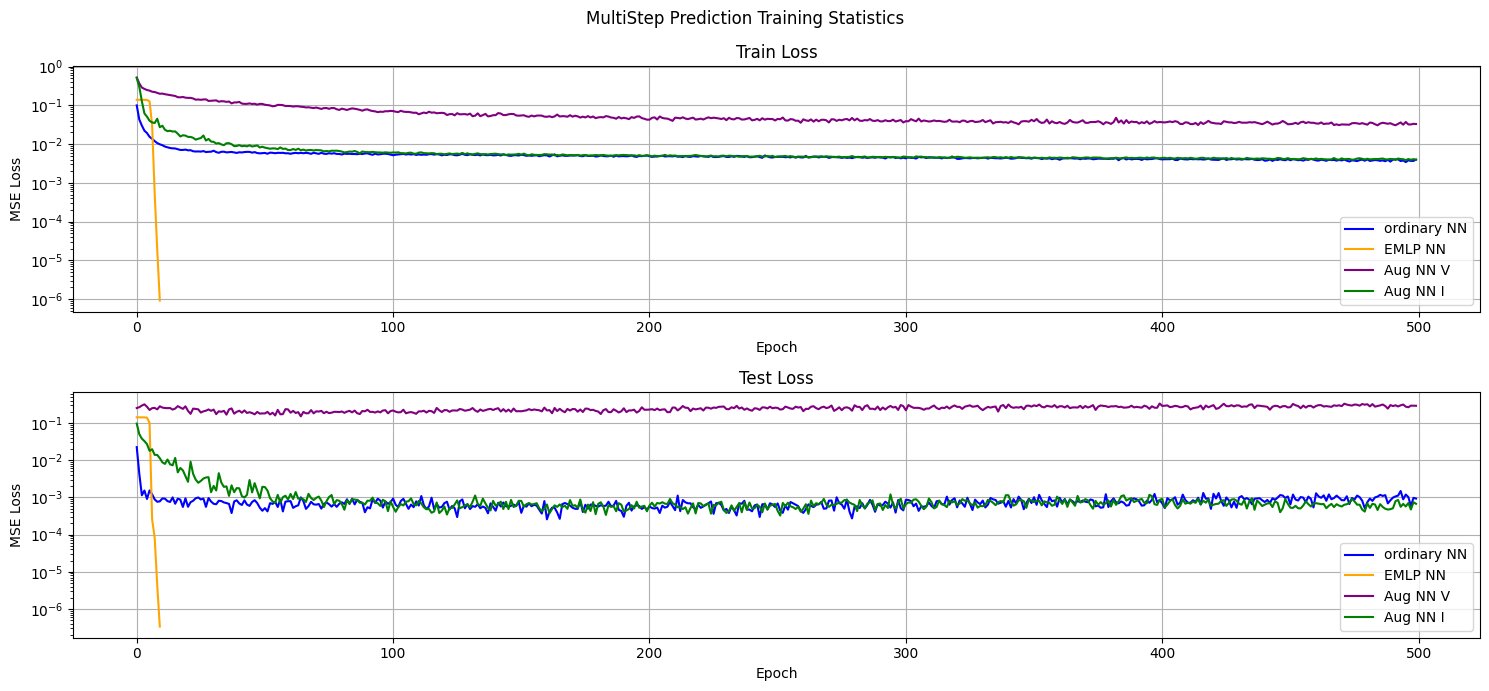

In [8]:
# Plot training statistics
plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
plt.plot(stats['train_loss'],label='ordinary NN',color='blue')
plt.plot(stats_emlp['train_loss'],label='EMLP NN',color='orange')
plt.plot(stats_aug_van['train_loss'],label='Aug NN V',color='purple')
plt.plot(stats_aug['train_loss'],label='Aug NN I',color='green')
plt.yscale('log')
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(stats['test_loss'],label='ordinary NN',color='blue')
plt.plot(stats_emlp['test_loss'],label='EMLP NN',color='orange')
plt.plot(stats_aug_van['test_loss'],label='Aug NN V',color='purple')
plt.plot(stats_aug['test_loss'],label='Aug NN I',color='green')
plt.yscale('log')
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

plt.suptitle('MultiStep Prediction Training Statistics')
plt.tight_layout()
plt.show()

In [9]:
print('Loading Spring Mass dataset...') 
with open('Data/spring_mass_dataset.pkl','rb') as file:
    data_dict = pickle.load(file)

Loading Spring Mass dataset...


In [10]:
test_coords = data_dict['test_coords']

In [11]:
last_sequence = test_coords[0,:input_timesteps,:]
n_steps = len(test_coords[0,:,:])-len(last_sequence)

forecast = forecast_nn(model,last_sequence,n_steps,n_dim)
forecast_aug_v = forecast_nn(model_aug_van,last_sequence,n_steps,n_dim)
forecast_aug_i = forecast_nn(model_aug,last_sequence,n_steps,n_dim)
forecast_e = forecast_emlp(model_emlp,last_sequence,n_steps,n_dim)



Mean Absolute Errors:
Model                     Position MAE    Velocity MAE    Energy MAE     
----------------------------------------------------------------------
Baseline MLP              0.143792        0.138087        0.087192       
Vanilla Augmentation      0.340202        0.317058        0.132831       
Improved Augmentation     0.148592        0.123274        0.073158       
EMLP                      0.012679        0.010724        0.010008       


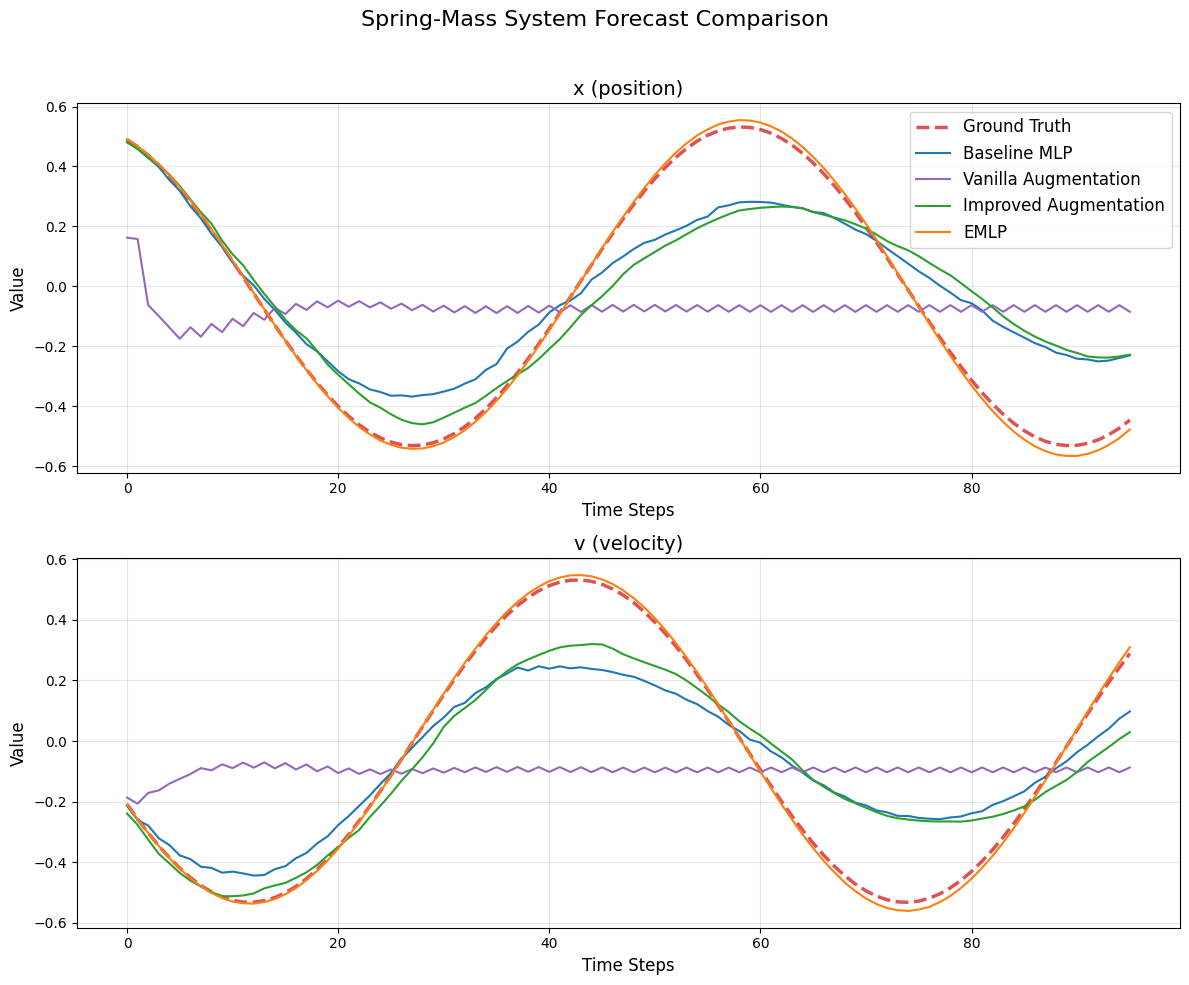

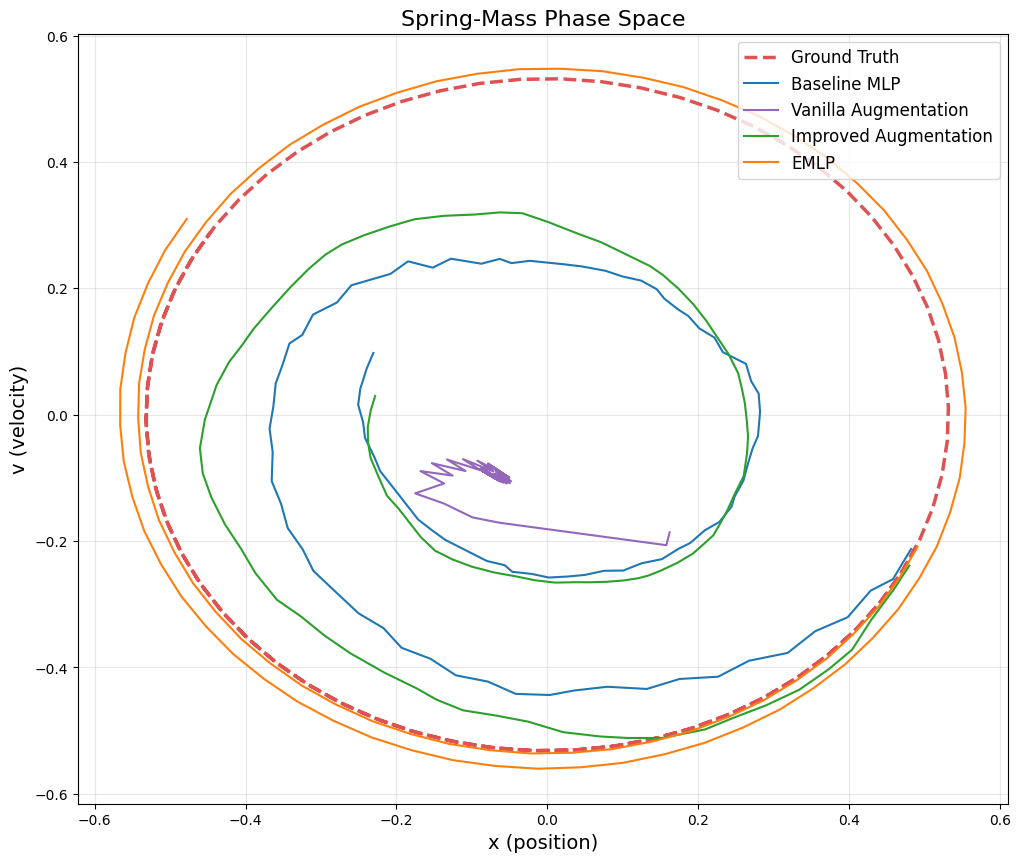

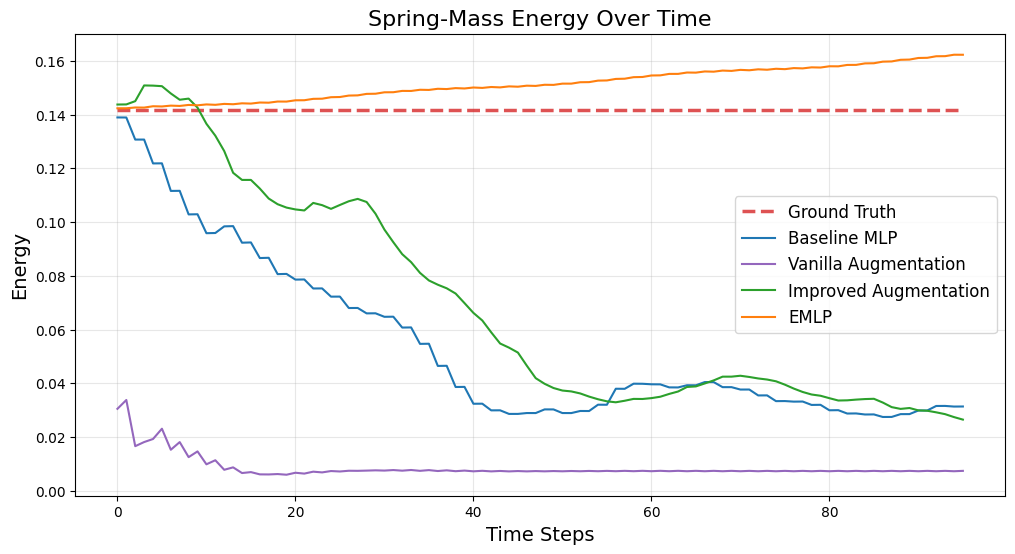

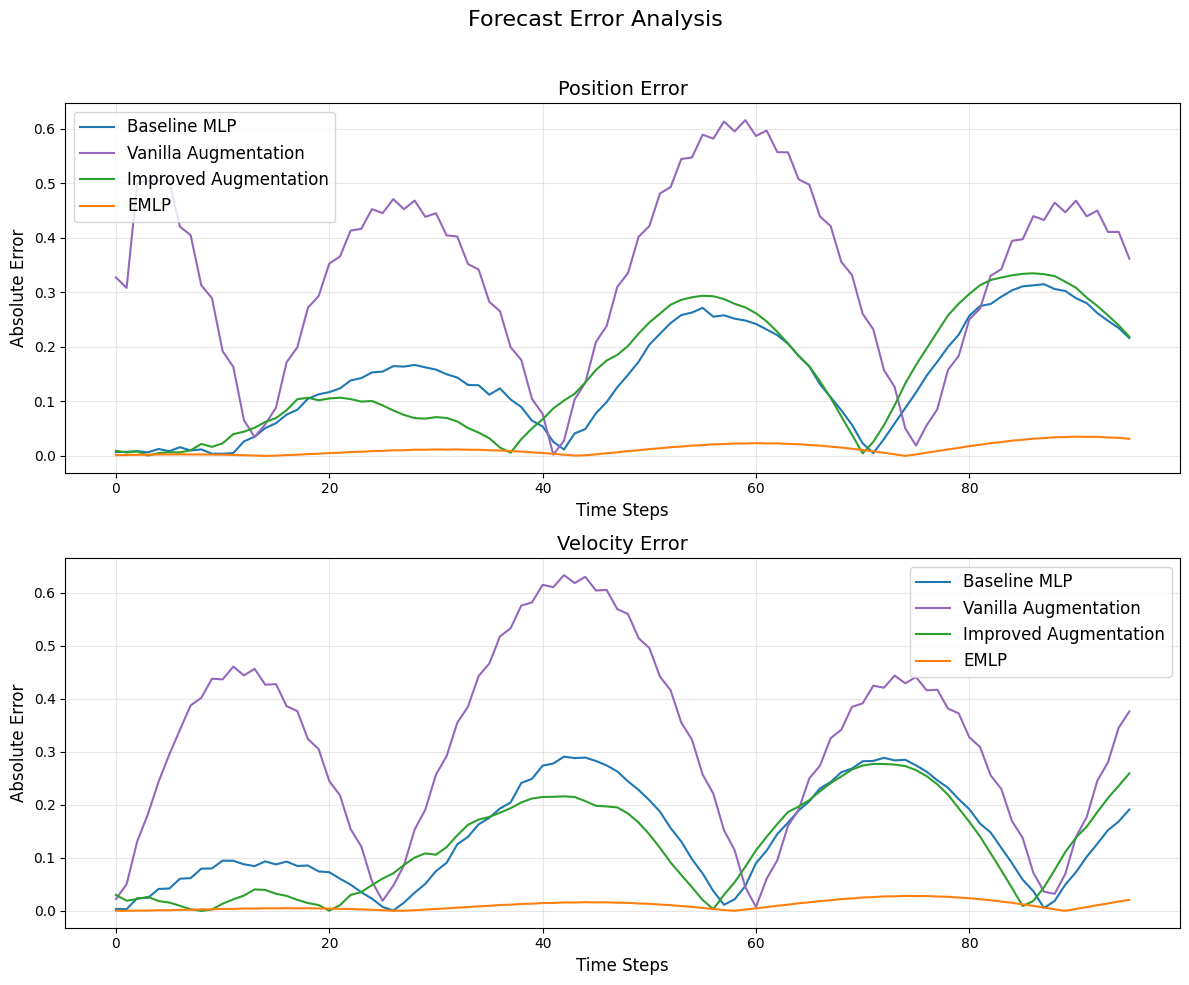

In [12]:
def plot_spring_mass_forecasts(forecast, forecast_aug_v, forecast_aug_i, forecast_e, test_coords, input_timesteps):
    """
    Plot spring-mass system position and velocity forecasts from different models.
    
    Parameters:
    -----------
    forecast : array - Baseline model predictions
    forecast_aug_v : array - Vanilla augmentation model predictions
    forecast_aug_i : array - Improved augmentation model predictions
    forecast_e : array - EMLP model predictions
    test_coords : array - Ground truth coordinates
    input_timesteps : int - Number of initial timesteps used for prediction
    n_steps : int - Number of prediction steps
    """
    # Extract ground truth data for comparison
    n_steps = len(forecast)
    ground_truth = test_coords[0, input_timesteps:input_timesteps+n_steps]
    
    # Create time steps for x-axis
    time_steps = np.arange(n_steps)
    
    # Define a consistent color scheme
    colors = {
        'ground_truth': '#d62728',  # Red
        'baseline': '#1f77b4',      # Blue
        'aug_vanilla': '#9467bd',   # Purple
        'aug_improved': '#2ca02c',  # Green
        'emlp': '#ff7f0e'           # Orange
    }
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    fig.suptitle('Spring-Mass System Forecast Comparison', fontsize=16)
    
    # Variable names
    var_names = ['x (position)', 'v (velocity)']
    
    # Plot both variables
    for i, ax in enumerate(axes.flat):
        # Plot predictions from all models
        ax.plot(time_steps, ground_truth[:, i], '--', color=colors['ground_truth'], 
                label='Ground Truth', linewidth=2.5, alpha=0.8)
        ax.plot(time_steps, forecast[:, i], '-', color=colors['baseline'], 
                label='Baseline MLP', linewidth=1.5)
        ax.plot(time_steps, forecast_aug_v[:, i], '-', color=colors['aug_vanilla'], 
                label='Vanilla Augmentation', linewidth=1.5)
        ax.plot(time_steps, forecast_aug_i[:, i], '-', color=colors['aug_improved'], 
                label='Improved Augmentation', linewidth=1.5)
        ax.plot(time_steps, forecast_e[:, i], '-', color=colors['emlp'], 
                label='EMLP', linewidth=1.5)
        
        ax.set_title(f'{var_names[i]}', fontsize=14)
        ax.set_xlabel('Time Steps', fontsize=12)
        ax.set_ylabel('Value', fontsize=12)
        ax.grid(True, alpha=0.3)
        
        # Only add legend to the first plot to save space
        if i == 0:
            ax.legend(fontsize=12, loc='best')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
    
    # Create phase space plot (position vs. velocity)
    plt.figure(figsize=(12, 10))
    plt.title('Spring-Mass Phase Space', fontsize=16)
    
    plt.plot(ground_truth[:, 0], ground_truth[:, 1], '--', color=colors['ground_truth'], 
             label='Ground Truth', linewidth=2.5, alpha=0.8)
    plt.plot(forecast[:, 0], forecast[:, 1], '-', color=colors['baseline'], 
             label='Baseline MLP', linewidth=1.5)
    plt.plot(forecast_aug_v[:, 0], forecast_aug_v[:, 1], '-', color=colors['aug_vanilla'], 
             label='Vanilla Augmentation', linewidth=1.5)
    plt.plot(forecast_aug_i[:, 0], forecast_aug_i[:, 1], '-', color=colors['aug_improved'], 
             label='Improved Augmentation', linewidth=1.5)
    plt.plot(forecast_e[:, 0], forecast_e[:, 1], '-', color=colors['emlp'], 
             label='EMLP', linewidth=1.5)
    
    plt.xlabel('x (position)', fontsize=14)
    plt.ylabel('v (velocity)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12, loc='best')
    
    # Calculate and plot the energy
    plt.figure(figsize=(12, 6))
    plt.title('Spring-Mass Energy Over Time', fontsize=16)
    
    # For a spring-mass system, E = 0.5*v² + 0.5*k*x²
    # Assuming mass=1, spring constant k=1 for simplicity
    def spring_mass_energy(position, velocity, k=1.0):
        return 0.5 * velocity**2 + 0.5 * k * position**2
    
    plt.plot(time_steps, spring_mass_energy(ground_truth[:, 0], ground_truth[:, 1]), '--', 
             color=colors['ground_truth'], label='Ground Truth', linewidth=2.5, alpha=0.8)
    plt.plot(time_steps, spring_mass_energy(forecast[:, 0], forecast[:, 1]), '-', 
             color=colors['baseline'], label='Baseline MLP', linewidth=1.5)
    plt.plot(time_steps, spring_mass_energy(forecast_aug_v[:, 0], forecast_aug_v[:, 1]), '-', 
             color=colors['aug_vanilla'], label='Vanilla Augmentation', linewidth=1.5)
    plt.plot(time_steps, spring_mass_energy(forecast_aug_i[:, 0], forecast_aug_i[:, 1]), '-', 
             color=colors['aug_improved'], label='Improved Augmentation', linewidth=1.5)
    plt.plot(time_steps, spring_mass_energy(forecast_e[:, 0], forecast_e[:, 1]), '-', 
             color=colors['emlp'], label='EMLP', linewidth=1.5)
    
    plt.xlabel('Time Steps', fontsize=14)
    plt.ylabel('Energy', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12, loc='best')
    
    # Calculate error metrics for quantitative comparison
    plt.figure(figsize=(12, 10))
    plt.suptitle('Forecast Error Analysis', fontsize=16)
    
    # Position error
    plt.subplot(2, 1, 1)
    plt.title('Position Error', fontsize=14)
    
    position_error_baseline = np.abs(forecast[:, 0] - ground_truth[:, 0])
    position_error_aug_v = np.abs(forecast_aug_v[:, 0] - ground_truth[:, 0])
    position_error_aug_i = np.abs(forecast_aug_i[:, 0] - ground_truth[:, 0])
    position_error_emlp = np.abs(forecast_e[:, 0] - ground_truth[:, 0])
    
    plt.plot(time_steps, position_error_baseline, '-', color=colors['baseline'], 
             label='Baseline MLP', linewidth=1.5)
    plt.plot(time_steps, position_error_aug_v, '-', color=colors['aug_vanilla'], 
             label='Vanilla Augmentation', linewidth=1.5)
    plt.plot(time_steps, position_error_aug_i, '-', color=colors['aug_improved'], 
             label='Improved Augmentation', linewidth=1.5)
    plt.plot(time_steps, position_error_emlp, '-', color=colors['emlp'], 
             label='EMLP', linewidth=1.5)
    
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel('Absolute Error', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12, loc='best')
    
    # Velocity error
    plt.subplot(2, 1, 2)
    plt.title('Velocity Error', fontsize=14)
    
    velocity_error_baseline = np.abs(forecast[:, 1] - ground_truth[:, 1])
    velocity_error_aug_v = np.abs(forecast_aug_v[:, 1] - ground_truth[:, 1])
    velocity_error_aug_i = np.abs(forecast_aug_i[:, 1] - ground_truth[:, 1])
    velocity_error_emlp = np.abs(forecast_e[:, 1] - ground_truth[:, 1])
    
    plt.plot(time_steps, velocity_error_baseline, '-', color=colors['baseline'], 
             label='Baseline MLP', linewidth=1.5)
    plt.plot(time_steps, velocity_error_aug_v, '-', color=colors['aug_vanilla'], 
             label='Vanilla Augmentation', linewidth=1.5)
    plt.plot(time_steps, velocity_error_aug_i, '-', color=colors['aug_improved'], 
             label='Improved Augmentation', linewidth=1.5)
    plt.plot(time_steps, velocity_error_emlp, '-', color=colors['emlp'], 
             label='EMLP', linewidth=1.5)
    
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel('Absolute Error', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12, loc='best')
    
    # Print mean absolute errors for each model
    print("Mean Absolute Errors:")
    print(f"{'Model':<25} {'Position MAE':<15} {'Velocity MAE':<15} {'Energy MAE':<15}")
    print("-" * 70)
    
    # Calculate energy errors
    energy_gt = spring_mass_energy(ground_truth[:, 0], ground_truth[:, 1])
    energy_baseline = spring_mass_energy(forecast[:, 0], forecast[:, 1])
    energy_aug_v = spring_mass_energy(forecast_aug_v[:, 0], forecast_aug_v[:, 1])
    energy_aug_i = spring_mass_energy(forecast_aug_i[:, 0], forecast_aug_i[:, 1])
    energy_emlp = spring_mass_energy(forecast_e[:, 0], forecast_e[:, 1])
    
    energy_error_baseline = np.abs(energy_baseline - energy_gt)
    energy_error_aug_v = np.abs(energy_aug_v - energy_gt)
    energy_error_aug_i = np.abs(energy_aug_i - energy_gt)
    energy_error_emlp = np.abs(energy_emlp - energy_gt)
    
    # Print MAE metrics
    models = {
        'Baseline MLP': (position_error_baseline, velocity_error_baseline, energy_error_baseline),
        'Vanilla Augmentation': (position_error_aug_v, velocity_error_aug_v, energy_error_aug_v),
        'Improved Augmentation': (position_error_aug_i, velocity_error_aug_i, energy_error_aug_i),
        'EMLP': (position_error_emlp, velocity_error_emlp, energy_error_emlp)
    }
    
    for model_name, errors in models.items():
        pos_mae = np.mean(errors[0])
        vel_mae = np.mean(errors[1])
        energy_mae = np.mean(errors[2])
        print(f"{model_name:<25} {pos_mae:<15.6f} {vel_mae:<15.6f} {energy_mae:<15.6f}")
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
    plt.show()

# Call the function with your spring-mass data
plot_spring_mass_forecasts(
    forecast, 
    forecast_aug_v, 
    forecast_aug_i, 
    forecast_e, 
    test_coords, 
    input_timesteps, 
)

In [13]:
## Computing Error metrics 

n = 10  # Number of samples
indices = np.random.choice(test_coords.shape[0], min(n,test_coords.shape[0]), replace=False)

def mse_comp(arr1,arr2):
    assert arr1.shape == arr2.shape 

    squared_diff = (arr1-arr2)**2 
    return np.mean(squared_diff)

mse = {
    'MO NN':[],
    'MO NN EMLP':[],
    'MO NN Aug V':[], 
    'MO NN Aug I': [],
}

for i,idx in enumerate(indices):
    print(f'Trial {i+1}')
    sim = test_coords[idx,input_timesteps:,:]

    last_sequence = test_coords[idx,:input_timesteps,:]
    n_steps = len(test_coords[idx,:,:])-len(last_sequence)

    nn_forecast = forecast_nn(model,last_sequence,n_steps,n_dim)
    aug_V_forecast = forecast_nn(model_aug_van,last_sequence,n_steps,n_dim)
    aug_I_forecast = forecast_nn(model_aug,last_sequence,n_steps,n_dim)
    emlp_forecast = forecast_emlp(model_emlp,last_sequence,n_steps,n_dim)



    mse['MO NN'].append(mse_comp(sim,nn_forecast))
    mse['MO NN EMLP'].append(mse_comp(sim,emlp_forecast))
    mse['MO NN Aug V'].append(mse_comp(sim,aug_V_forecast))
    mse['MO NN Aug I'].append(mse_comp(sim,aug_I_forecast))



Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 10


In [14]:
for k in mse.keys():
    print(f'{k} : {np.mean(mse[k])}')

MO NN : 0.044653255864839356
MO NN EMLP : 0.00027439303940197664
MO NN Aug V : 0.16497597631761757
MO NN Aug I : 0.04123088615158736


In [15]:
print('MO NN :',stats['test_loss'][-1])
print('MO NN EMLP :',stats_emlp['test_loss'][-1])
print('MO NN Aug:',stats_aug['test_loss'][-1])

MO NN : 0.0009270456835760602
MO NN EMLP : 3.3576137e-07
MO NN Aug: 0.0006708618852176837


: 